In [9]:
import numpy as np
import matplotlib.pyplot as plt


In [60]:
def generate_trajectory(sigma_w_2, sigma_n_2, M, X_0):
    sigma_w = sigma_w_2 ** 0.5
    sigma_n = sigma_n_2 ** 0.5
    w = np.random.normal(0, sigma_w, M)
    n = np.random.normal(0, sigma_n, M)

    x = w.dot(np.tril(np.ones((M, M)))) + X_0 * np.ones(M)
    z = x + n
    return x, z

def calculate_exp_w_n(z):
    v = z - np.roll(z,1)
    p = z - np.roll(z,2)
    E_v = np.average((v ** 2)[1:])
    E_p = np.average((p ** 2)[2:])
    return E_p - E_v, E_v - E_p / 2

def alpha(sigma_w_2, sigma_n_2):
    chi = sigma_w_2 / sigma_n_2
    return (-chi + (chi**2 + 4 * chi) ** 0.5) / 2

def M_opt(alpha):
    return round((2 - alpha) / alpha)

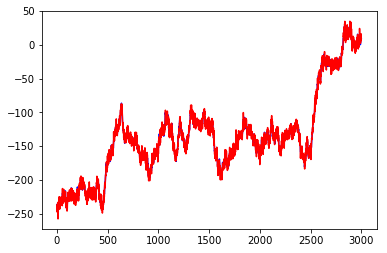

In [33]:
M = 3000
X_0 = 10
sigma_w_2 = 8
sigma_n_2 = 16
sigma_w = sigma_w_2 ** 0.5
sigma_n = sigma_n_2 ** 0.5
w = np.random.normal(0, sigma_w, M)
n = np.random.normal(0, sigma_n, M)

x = w.dot(np.tril(np.ones((M, M)))) + X_0 * np.ones(M)
z = x + n
plt.plot(x, 'b')
plt.plot(z, 'r')
plt.show()

In [34]:
v = z - np.roll(z,1)
p = z - np.roll(z,2)
E_v = np.average((v ** 2)[1:])
E_p = np.average((p ** 2)[2:])
exp_sigma_w_2 = E_p - E_v
exp_sigma_n_2 = E_v - E_p / 2
print(exp_sigma_w_2, exp_sigma_n_2)
alpha(sigma_w_2, sigma_n_2)

8.80402904993 15.7760803022


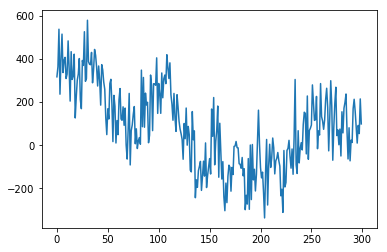

28 97
(1138.5446052663829, 8697.8825365942721)
(33.742326613118763, 93.262439044849515)
7
0.302222467229


In [95]:
x, z = generate_trajectory(28**2, 97**2, 300, 10)
plt.plot(z)
plt.show()
alpha_opt = alpha(28**2, 97**2)
M = M_opt(alpha_opt)
print(28, 97)
print(calculate_exp_w_n(z))
print(tuple(map(lambda y: y**0.5, tuple(calculate_exp_w_n(z)))))

print(M_opt(alpha(28**2, 97**2)))
print(alpha(*calculate_exp_w_n(z)))

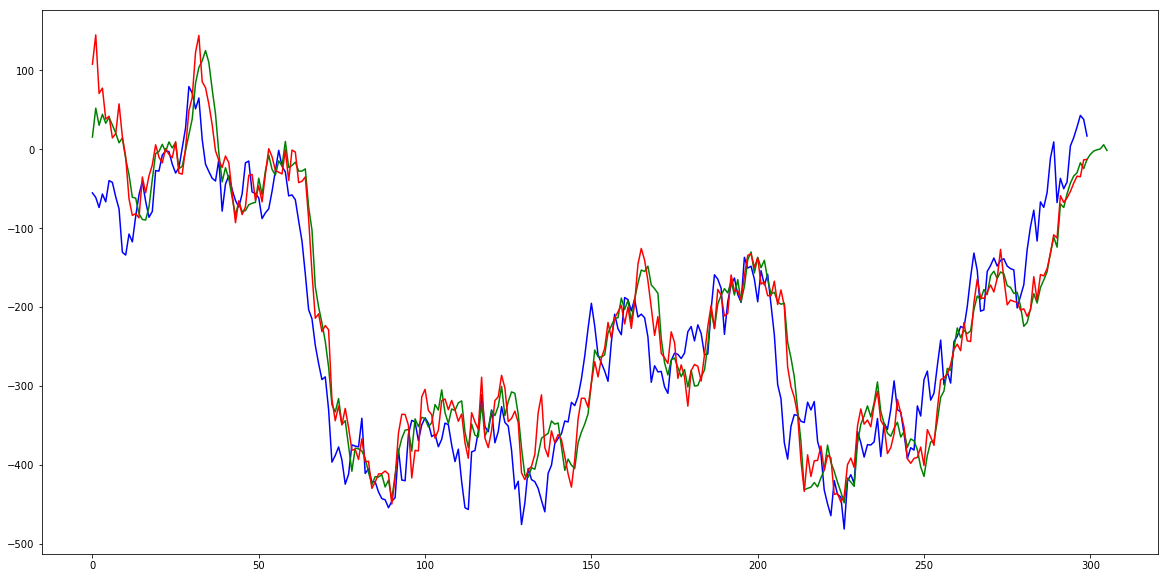

In [94]:
def running_mean(z, M):
    mask = np.ones(M) / M
    return np.convolve(z, mask)

def exp_mean(z, alpha):
    exp_mean_z = z.copy()
    for i in range(1, len(z)):
        exp_mean_z[i] = exp_mean_z[i - 1] + alpha * (z[i] - exp_mean_z[i - 1])
    return exp_mean_z

plt.figure(figsize=(20,10))
plt.plot(x, 'b')
plt.plot(running_mean(z, M), 'g')
plt.plot(exp_mean(z, alpha_opt), 'r')
plt.show()